<a href="https://colab.research.google.com/github/StillWork/ds-lab/blob/master/gg_51_MNIST_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# f-6-MNIST-keras
- 케라스를 이용한 MNIST

## 데이터 로드

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

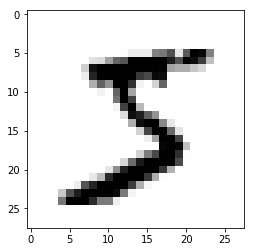

In [5]:
plt.imshow(train_images[0], cmap=plt.cm.binary)

## MLP

In [6]:
train_images = train_images.reshape((60000, 784)) # 1 : 이미지 색상 레이어 표현 ,1 흑백 3이면 컬러
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [7]:
from keras import layers
from keras import models

In [23]:
model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape = (784,)))
# model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [37]:
model.fit(train_images, train_labels, epochs=1, batch_size=32)

Epoch 1/1
60000/60000 [==============================] - 7s 121us/step - loss: 0.2427 - acc: 0.9288


In [38]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 56us/step


[0.13391637645121665, 0.959]

In [39]:
y_pred = model.predict(test_images)
y_pred[0]

array([1.06498806e-06, 1.35294576e-08, 1.32225556e-04, 7.26345388e-05,
       1.54988455e-09, 6.54215364e-06, 7.64465366e-11, 9.99779046e-01,
       4.62886192e-07, 8.01237366e-06], dtype=float32)

In [40]:
import numpy as np
np.argmax(y_pred[0])

7

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(train_images, train_labels)
rfc.score(test_images, test_labels)

0.8695

## MNIST 데이터 전처리

In [48]:
z = [1, 2, 5]
z_cat = to_categorical(z)
z_cat

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [4]:
train_images = train_images.reshape((60000, 28, 28, 1)) # 1 : 이미지 색상 레이어 표현 ,1 흑백 3이면 컬러
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [5]:
test_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [6]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## CNN 모델 생성

In [16]:
from keras import layers
from keras import models

# model = tf.keras.models.Sequential()과 같은 내용이다
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Dropout(rate=0.3)  # 30%만 통과시킴, 보통 0.2~0.3이용, 랜덤포레스트 느낌, 성능이 더 좋아짐
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(10, activation='softmax'))

model.summary()
          

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                102464    
___________________________

## 훈련

In [8]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=1, batch_size=64)

Epoch 1/1
60000/60000 [==============================] - 58s 970us/step - loss: 0.1534 - acc: 0.9534


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_loss = ',test_loss)
print('test_acc = ',test_acc)

10000/10000 [==============================] - 4s 399us/step
test_loss =  0.07243826545095071
test_acc =  0.9777
